# ECG Classification Project

Electrocardiogram (ECG) classification plays acrucial role in diagnosing cardiovascular diseases by analyzing electrical activity of the heart. This project aids to classify ECG iages into different categories .

# **ECG Signal Overview**

An Electrocardiogram (ECG) is a diagnostic tool used to measure and record the electrical activity of the heart over a period of time. It provides crucial information about the heart's rhythm and electrical conduction, making it essential for detecting various cardiac conditions.

**Key Features of an ECG Signal:**

**P wave**: Represents atrial depolarization (contraction of the atria).

**QRS** complex: Corresponds to ventricular depolarization (contraction of the ventricles). It is the most prominent feature in the ECG signal.

**T wave**: Reflects ventricular repolarization (relaxation of the ventricles).

**PR Interval**: The time interval between the onset of the P wave and the start of the QRS complex, indicating the conduction from the atria to the ventricles.

**ST Segment**: The flat section of the ECG between the QRS complex and the T wave, which is crucial for detecting ischemic changes.


**Common Uses of ECG Signals:**

Diagnosis of Arrhythmias: Detect abnormal heart rhythms.

Detection of Myocardial Infarction: Identify heart attacks by observing changes in the ST segment.

Monitoring Cardiac Health: Used in routine check-ups or continuous monitoring in critical care.

# ECG Signal Consists of 12 Leads

*  An Electrocardiogram (ECG) signal consists of 12 leads that capture the
    electrical activity of the heart from different angles. This standard 12-lead ECG system provides a comprehensive view of the heart’s function, helping in the diagnosis of various cardiac conditions.

*  These 12 leads are derived using 10 electrodes placed strategically on the
    body.

# Types of Leads in a 12-Lead ECG

1. Limb Leads (6 leads):

    Bipolar Leads: I, II, III — record electrical differences between two limbs.

    Augmented Leads: aVR, aVL, aVF — use a single positive electrode and a combined reference point.


2. Chest (Precordial) Leads (6 leads):

    Unipolar Leads: V1 to V6 — provide a horizontal view of the heart.


This arrangement allows the ECG to capture both the frontal (vertical) and transverse (horizontal) planes of cardiac activity, providing critical information about the heart's electrical conduction system, rhythm, and potential abnormalities.

# Dataset Overview

The ECG arrhythmia database is the image version of this dataset(https://www.kaggle.com/shayanfazeli/heartbeat).

This dataset has been used in exploring heartbeat classification using deep neural network architectures, and observing some of the capabilities of transfer learning on it. The signals correspond to electrocardiogram (ECG) shapes of heartbeats for the normal case and the cases affected by different arrhythmias and myocardial infarction. These signals are preprocessed and segmented, with each segment corresponding to a heartbeat.

**MIT- Arrhythmia Dataset contains:**
*   Number of Samples: 109446
*   Number of Categories: 5
*   Sampling Frequency: 125Hz
*   Data Source: Physionet's MIT-BIH Arrhythmia Dataset
*   Classes: ['F','M','N', 'S',, 'V', 'Q']
.




In [1]:
#connect with kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
#  download dataset from kaggle

!kaggle datasets download -d erhmrai/ecg-image-data


Dataset URL: https://www.kaggle.com/datasets/erhmrai/ecg-image-data
License(s): CC-BY-NC-SA-4.0


In [4]:
!unzip /content/ecg-image-data.zip

Streaming output truncated to the last 5000 lines.
  inflating: ECG_Image_data/train/V/V1869.png  
  inflating: ECG_Image_data/train/V/V187.png  
  inflating: ECG_Image_data/train/V/V1870.png  
  inflating: ECG_Image_data/train/V/V1871.png  
  inflating: ECG_Image_data/train/V/V1872.png  
  inflating: ECG_Image_data/train/V/V1874.png  
  inflating: ECG_Image_data/train/V/V1877.png  
  inflating: ECG_Image_data/train/V/V1879.png  
  inflating: ECG_Image_data/train/V/V188.png  
  inflating: ECG_Image_data/train/V/V1880.png  
  inflating: ECG_Image_data/train/V/V1881.png  
  inflating: ECG_Image_data/train/V/V1882.png  
  inflating: ECG_Image_data/train/V/V1883.png  
  inflating: ECG_Image_data/train/V/V1884.png  
  inflating: ECG_Image_data/train/V/V1885.png  
  inflating: ECG_Image_data/train/V/V1886.png  
  inflating: ECG_Image_data/train/V/V1887.png  
  inflating: ECG_Image_data/train/V/V1889.png  
  inflating: ECG_Image_data/train/V/V1892.png  
  inflating: ECG_Image_data/train/V/V18

# Function to get dimensions of the image

In [5]:
# Function to get image dimensions
def get_image_dimensions(image_path):
    try:
        with Image.open(image_path) as img:
            width, height = img.size
            return width, height
    except (FileNotFoundError, OSError):
        return None, None  # Handle cases where the file is not found or corrupted

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.initializers import HeUniform, GlorotUniform

import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import os
import random

from PIL import Image
import math
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import losses
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras import datasets

# Function for making a DataFrame

In [6]:
#  function for making adata frame

import pandas as pd
# Function to create a DataFrame from image data
def create_image_dataframe(data_dir):
    image_paths = []
    labels = []
    widths = []
    heights = []

    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                image_paths.append(image_path)
                labels.append(class_name)
                width, height = get_image_dimensions(image_path)
                widths.append(width)
                heights.append(height)

    df = pd.DataFrame({
        'image_path': image_paths,
        'label': labels,
        'width': widths,
        'height': heights
    })
    return df


# Create Train DataFramr and Test DataFrame

In [10]:

train_df = create_image_dataframe('/content/ECG_Image_data/train')
test_df = create_image_dataframe('/content/ECG_Image_data/test')

# Functions for EDA

In [11]:
#  functions for class distribution make it colorful

import matplotlib.pyplot as plt
import seaborn as sns

def plot_class_distribution(df, title="Class Distribution"):
    print(df['label'].value_counts())
    plt.figure(figsize=(10, 6))  # Increased figure size for better visibility
    sns.countplot(x='label', data=df, palette="viridis") # Use a colorful palette
    plt.title(title, fontsize=16) # Increased title font size
    plt.xlabel("Class", fontsize=12) # Increased x-axis label font size
    plt.ylabel("Count", fontsize=12) # Increased y-axis label font size
    plt.xticks(rotation=45, ha='right', fontsize=10) # Rotated x-axis labels
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

def image_dimension_distribution(df,hight_title,width_title):

   print(train_df.describe())

   plt.figure(figsize=(12, 5))
   plt.subplot(1, 2, 1)
   sns.histplot(train_df['width'], kde=True)
   plt.title(width_title)

   plt.subplot(1, 2, 2)
   sns.histplot(train_df['height'], kde=True)
   plt.title(hight_title)

   plt.tight_layout()
   plt.show()

# Function to display images in subplots
def plot_images_by_category(df, num_images_per_category=3):
    categories = df['label'].unique()
    num_categories = len(categories)

    # Calculate the optimal grid dimensions
    num_cols = min(num_categories, 5)  # Adjust as needed
    num_rows = math.ceil(num_categories / num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))  # Adjust figure size

    for i, category in enumerate(categories):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col] if num_rows > 1 else axes[col]

        category_images = df[df['label'] == category].head(num_images_per_category)
        for j, (index, row) in enumerate(category_images.iterrows()):
            try:
                image = Image.open(row['image_path'])
                ax.imshow(image)
                ax.set_title(f"{category} ({j+1})")
                ax.axis('off')
            except FileNotFoundError:
                print(f"File not found: {row['image_path']}")
                ax.set_title(f"Error: File not found")
                ax.axis('off')

        if num_categories < num_cols * num_rows:  # Hide unused subplots
          for k in range(i + 1, num_rows * num_cols):
            row = k // num_cols
            col = k % num_cols
            ax = axes[row, col] if num_rows > 1 else axes[col]
            ax.axis('off')

    plt.tight_layout()
    plt.show()





#  EDA for  Train_df


label
N    75709
M     8405
Q     6431
V     5789
S     2223
F      642
Name: count, dtype: int64


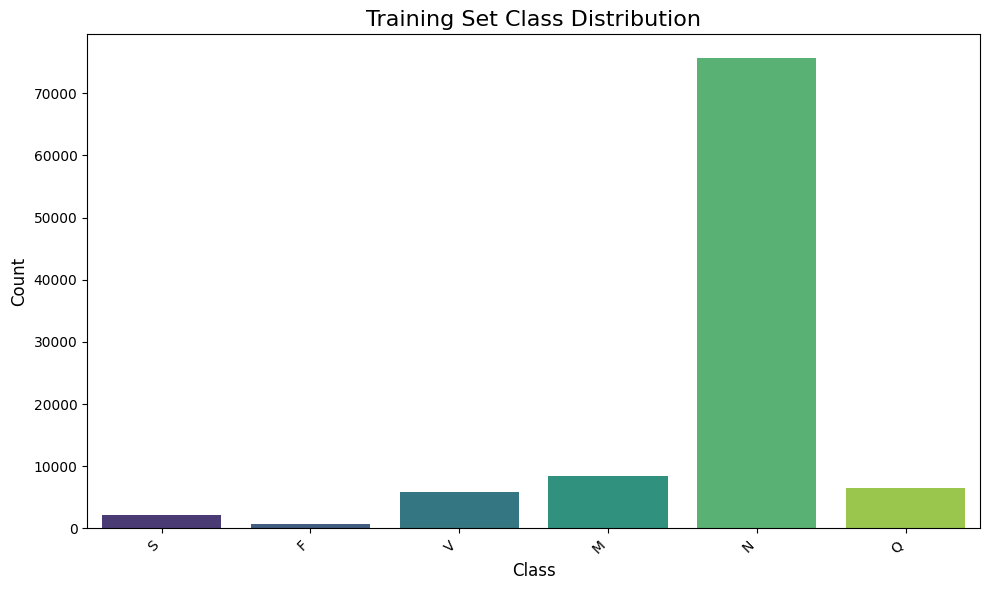

In [12]:
#  EDA for  Train_df
# 1. Class Distribution in train_df
plot_class_distribution(train_df, "Training Set Class Distribution")



**This dataset suffers from significant class imbalance,

 which requires proper handling to prevent overfitting and ensure the model generalizes well.**

# 2. Image Dimensions Analysis in train_df

         width   height
count  99199.0  99199.0
mean     432.0    288.0
std        0.0      0.0
min      432.0    288.0
25%      432.0    288.0
50%      432.0    288.0
75%      432.0    288.0
max      432.0    288.0


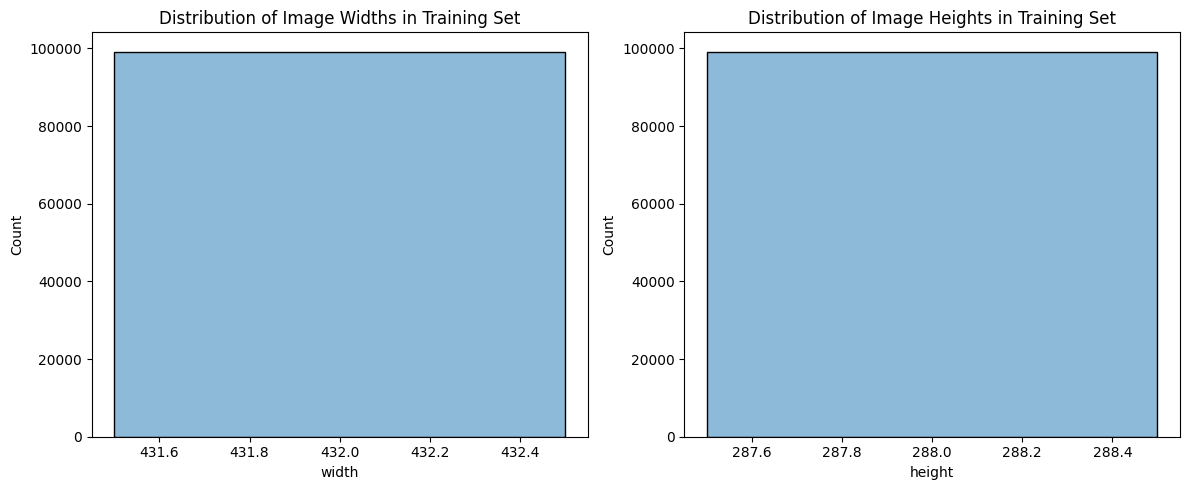

In [13]:
# 2. Image Dimensions Analysis in train_df
image_dimension_distribution(train_df,'Distribution of Image Heights in Training Set','Distribution of Image Widths in Training Set')


All images have the same size


#  Visually inspect sample images per class.

 This can help identify potential issues with image quality (blur, artifacts, etc.)



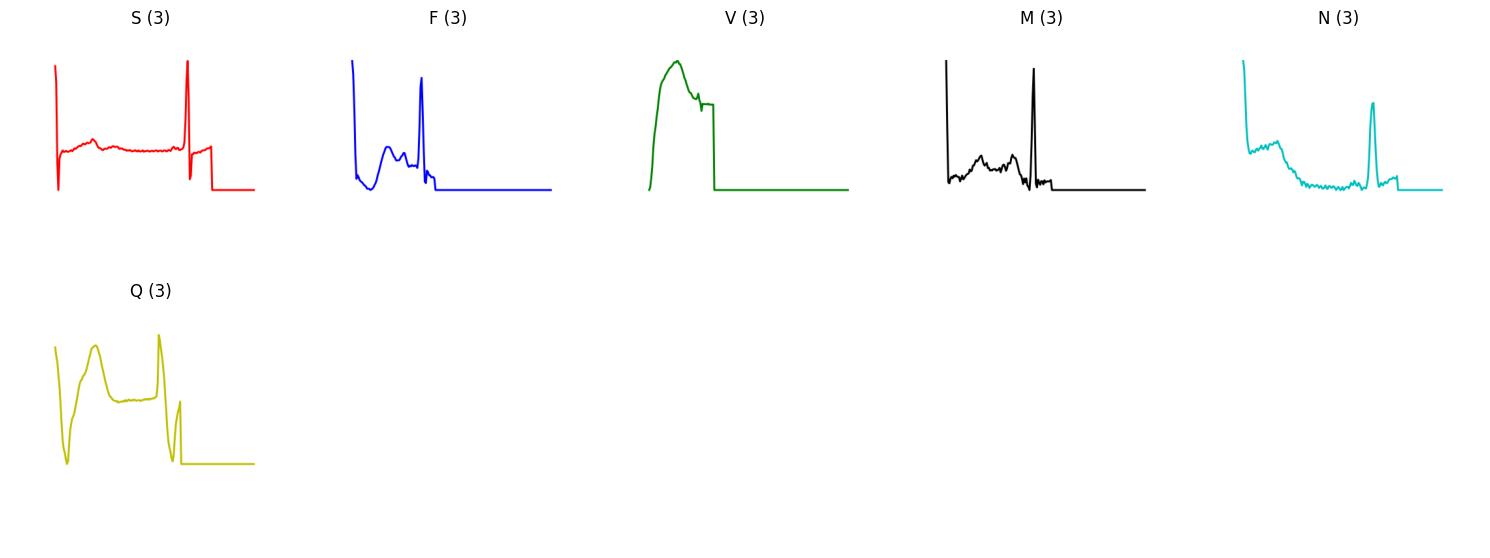

In [14]:
#  plot images from train_df that include all categort in subplot
# Call the function to plot images
plot_images_by_category(train_df)



# EDA for Test Dataset

label
N    18926
M     2101
Q     1608
V     1447
S      556
F      161
Name: count, dtype: int64


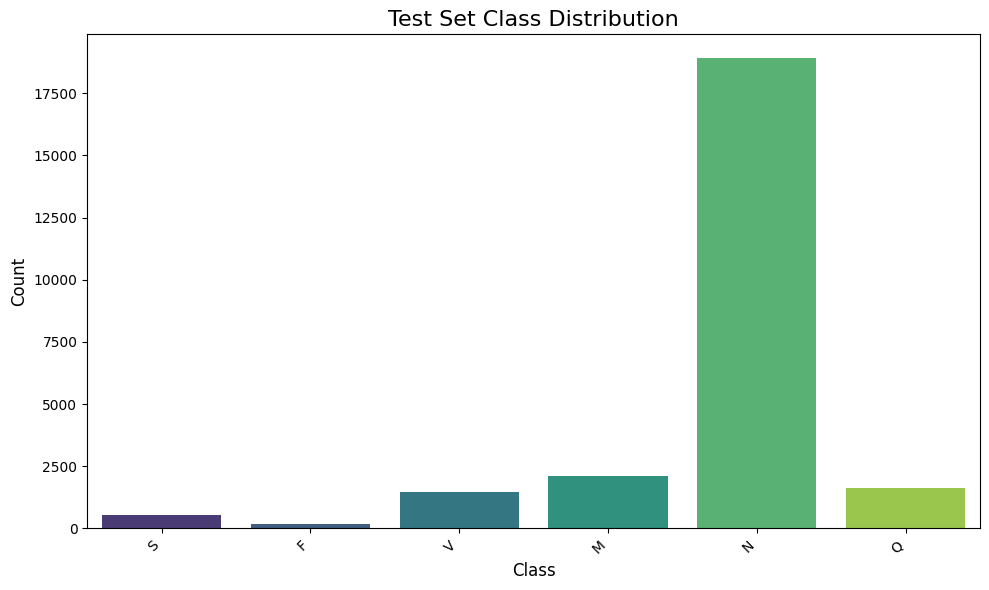

         width   height
count  99199.0  99199.0
mean     432.0    288.0
std        0.0      0.0
min      432.0    288.0
25%      432.0    288.0
50%      432.0    288.0
75%      432.0    288.0
max      432.0    288.0


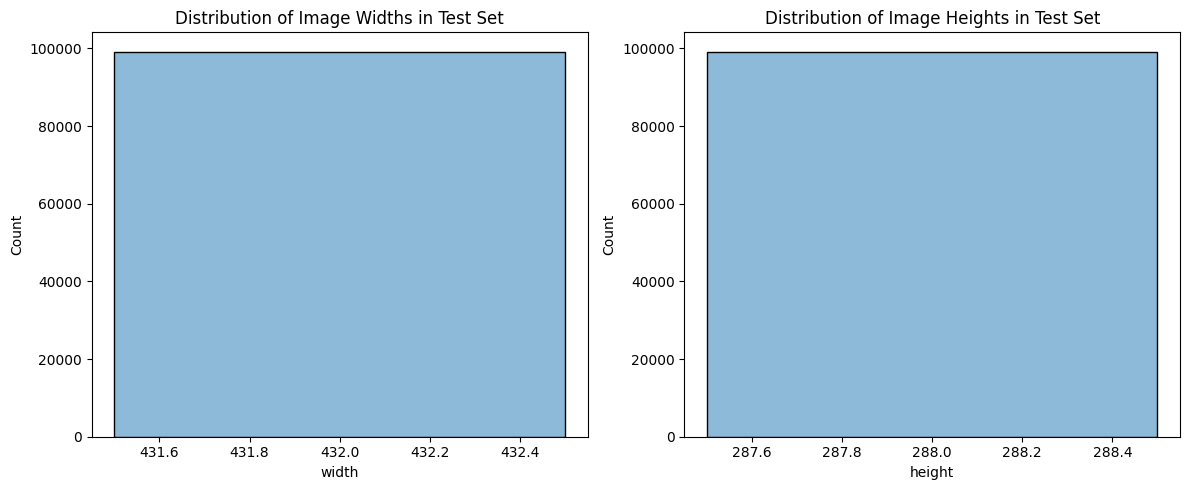

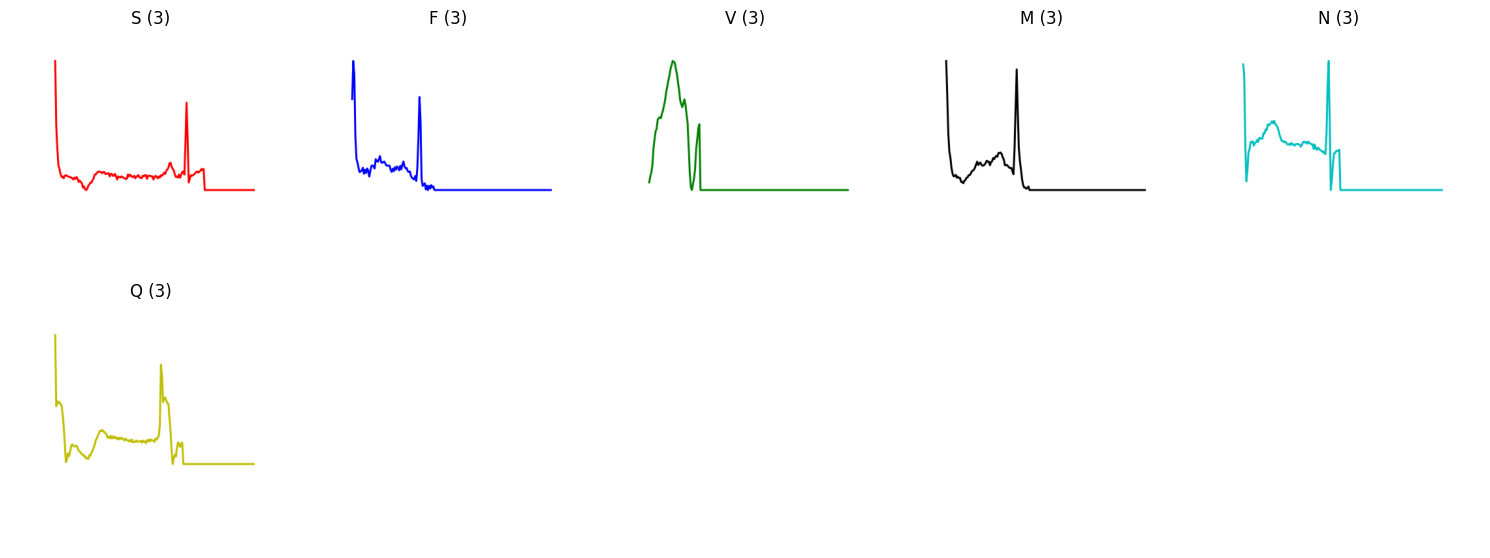

In [15]:
# call functions for EDA
plot_class_distribution(test_df, "Test Set Class Distribution")
image_dimension_distribution(test_df,
                             'Distribution of Image Heights in Test Set',
                             'Distribution of Image Widths in Test Set')
plot_images_by_category(test_df)

In [16]:
#  save train_df and test_df

# Save the DataFrames to CSV files
train_df.to_csv('ecg_train_df.csv', index=False)
test_df.to_csv('ecg_test_df.csv', index=False)
